# Session 1 - 선형 모델 구현하기

지금부터 학생들이 공부한 시간에 따라 산출된 시험 점수를 담은 데이터셋을 통해 어떠한 상관관계가 있는지 선형 모델을 이용하여 예측할 것이다. 이를 위해서 아래와 같은 Python Library를 사용할 것이다.

- Pandas : 데이터셋 관리를 위해
- Matplotlib : 그래프 시각화를 위해
- Scikit-Learn : 선형 모델 예측 신경망 가져오기

In [65]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 데이터셋 불러오기

In [66]:
dataset = pd.read_csv('student_score.csv')
dataset.head()

,Time,Score
0,22.10,80.7
1,13.30,48.5
2,13.20,63.6
3,20.10,83.6
4,0.31,11.5


## 선형 모델을 훈련 데이터로 학습하기

In [67]:
x = dataset[['Time']]
y = dataset[['Score']]
linear_model = LinearRegression()
linear_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 학습 결과 시각화

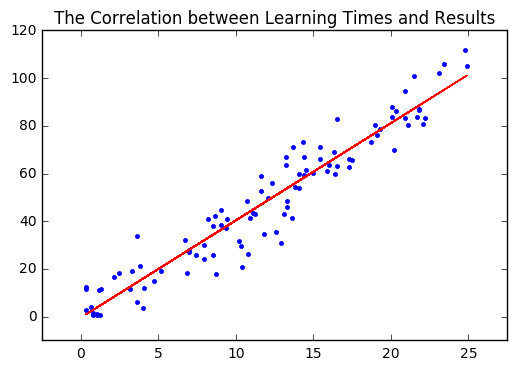

(array([-0.39999485]), array([[4.07687506]]))

In [68]:
plt.title("The Correlation between Learning Times and Results")
plt.plot(x, y, "b.")
plt.plot(x, linear_model.predict(x), "r-")
plt.axis((-2.5, 27.5, -10, 120))
plt.show()

linear_model.intercept_, linear_model.coef_

이와 같이 학생들의 학습 결과를 통한 상관관계가 비례함을 알 수 있다.
이 모델의 예측 함수는 가중치를 약 4 정도로, 편향을 -0.3 정도로 예측하였음을 알 수 있다.

## 손실 계산하기

In [70]:
model_rmse = np.sqrt(mean_squared_error(x, linear_model.predict(x)))
print(model_rmse)

41.63082025094473


손실 값이 너무 크다. 그러므로 이 데이터셋의 회귀를 구현하는데 선형 모델은 적합하지 않음을 알 수 있다.

## 테스트 데이터 예측하기

In [71]:
test_student = [[14.6]]
print(linear_model.predict(test_student))

[[59.12238106]]


이와 같이 선형 모델에 테스트 데이터를 넣어 14.6시간 동안 공부하면 약 59~60점이 나올 수 있다고 예상할 수 있다.